# Chapter 5 - Differentiation and Integration

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

plt.rcParams['text.usetex'] = True
%matplotlib notebook

In [25]:
def p_lagrange(xarray,yfunc):
    Ck = []
    for k in range(len(xarray)):
        Ckj=1
        for j in range(len(xarray)):
            if j==k: continue
            Ckj = Ckj*(xarray[k]-xarray[j])
            #print(k,j)
        
        #print(k, xarray[k], yfunc(xarray[k]), yfunc(xarray[k])/Ckj)
        Ck.append(yfunc(xarray[k])/Ckj)
    return Ck

## Integration

### area under curve

In [112]:
yfunc = lambda x: np.cos(x-0.1) + 0.4*x + 1.5

<IPython.core.display.Javascript object>


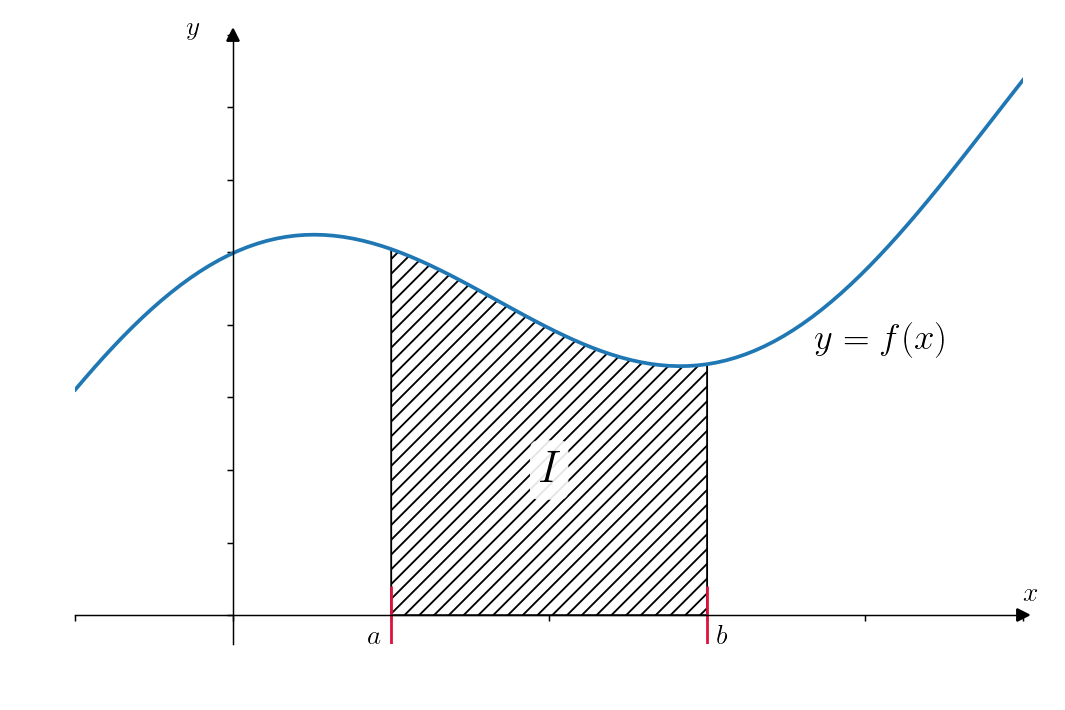

Text(2, 1, '$I$')

In [113]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=2)

#ax.add_patch(Polygon([(0, 0), (0, 1), (2, yfunc(2)), (2, 0)],
#                  hatch='\\', facecolor='none',edgecolor='black'))


a,b=1,3
x=np.linspace(a,b,100)
ax.fill_between(x, np.cos(x-0.1) + 0.4*x + 1.5, y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor='black')

ax.vlines(x=a, ymin=-0.2, ymax=0.2, color='crimson')
ax.vlines(x=b, ymin=-0.2, ymax=0.2, color='crimson')
ax.text(a-0.1,-0.15,r'$a$', fontsize=15, ha='center', va='center')
ax.text(b+0.1,-0.15,r'$b$', fontsize=15, ha='center', va='center')

squareside=3
centerx=2
centery=2
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(4.1,1.9,r'$y=f(x)$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(2,1,r'$I$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))


In [114]:
fig.savefig('../figures/ch5_integration.pdf')

### lagrange polynomial area

In [115]:
yfunc=lambda x: np.cos(x-0.1) + 0.4*x + 1.5

x_interp = [1.0,2.0,3.0,4.0]
x_interp = np.linspace(1,3,5,endpoint=True)
thing = p_lagrange(x_interp,yfunc)
yfunc_lagrange=lambda x: thing[0]*(x-x_interp[1])*(x-x_interp[2])*(x-x_interp[3])*(x-x_interp[4]) + \
                         thing[1]*(x-x_interp[0])*(x-x_interp[2])*(x-x_interp[3])*(x-x_interp[4]) + \
                         thing[2]*(x-x_interp[0])*(x-x_interp[1])*(x-x_interp[3])*(x-x_interp[4]) + \
                         thing[3]*(x-x_interp[0])*(x-x_interp[1])*(x-x_interp[2])*(x-x_interp[4]) + \
                         thing[4]*(x-x_interp[0])*(x-x_interp[1])*(x-x_interp[2])*(x-x_interp[3])

<IPython.core.display.Javascript object>


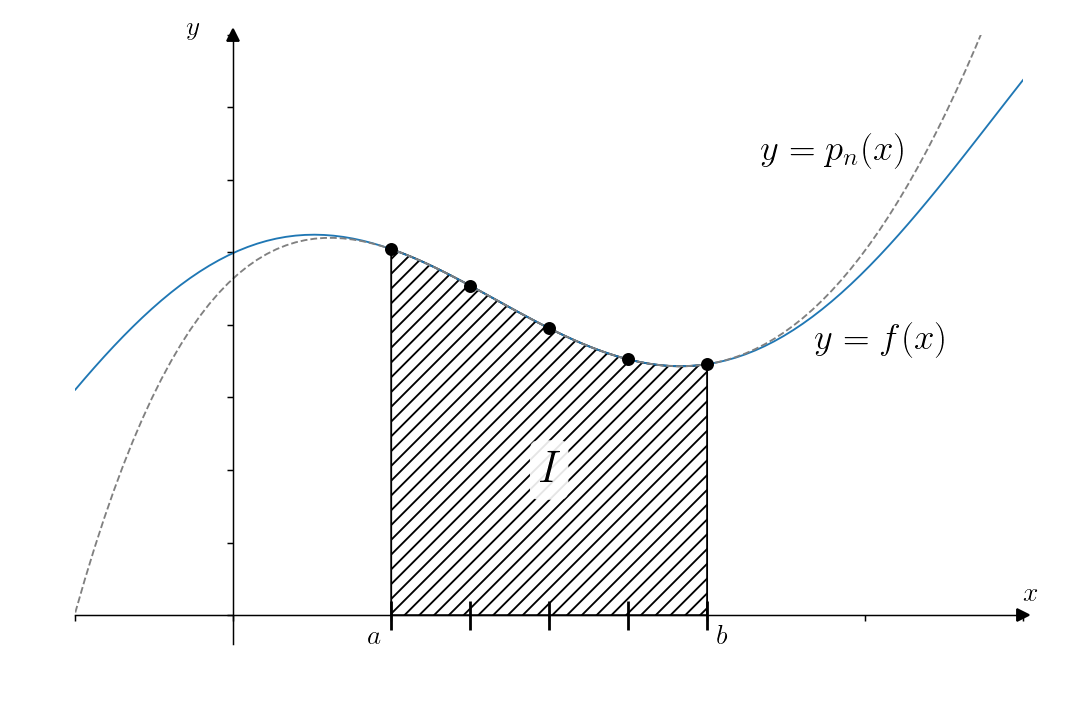

Text(2, 1, '$I$')

In [116]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=1)
ax.plot(xarray,yfunc_lagrange(xarray),color='grey',lw=1, ls='--')
ax.plot(x_interp,yfunc_lagrange(np.array(x_interp)),color='black',ls='',marker='o',markerfacecolor='black')

#ax.add_patch(Polygon([(0, 0), (0, 1), (2, yfunc(2)), (2, 0)],
#                  hatch='\\', facecolor='none',edgecolor='black'))


a,b=1,3
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor='black')

for x in x_interp:
    ax.vlines(x=x, ymin=-0.1, ymax=0.1, color='black')
ax.text(a-0.1,-0.15,r'$a$', fontsize=15, ha='center', va='center')
ax.text(b+0.1,-0.15,r'$b$', fontsize=15, ha='center', va='center')

squareside=3
centerx=2
centery=2
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(4.1,1.9,r'$y=f(x)$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(3.8,3.2,r'$y=p_n(x)$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(2,1,r'$I$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))


In [117]:
fig.savefig('../figures/ch5_lagrangian.pdf')

### trapezium rule

In [118]:
yfunc=lambda x: np.cos(x-0.1) + 0.4*x + 1.5

<IPython.core.display.Javascript object>


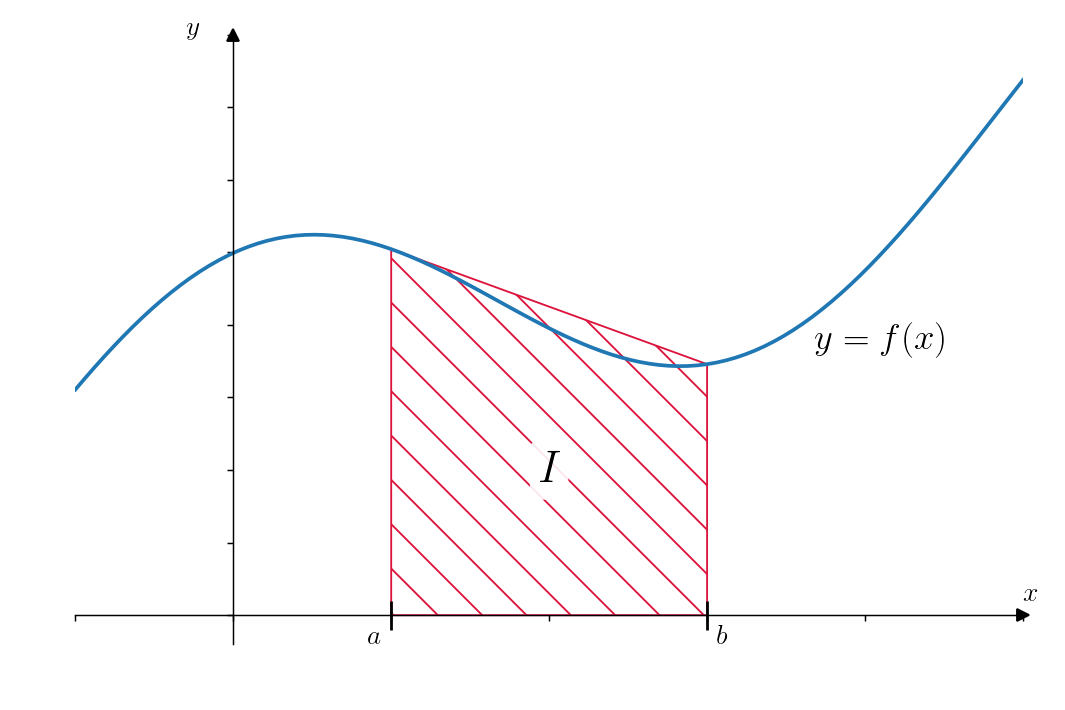

Text(2, 1, '$I$')

In [119]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=2)


a,b=1,3
ax.add_patch(Polygon([(a, 0), (a, yfunc(a)), (b, yfunc(b)), (b, 0)],
                  hatch='\\', facecolor='none',edgecolor='crimson'))

#x=np.linspace(a,b,100)
#ax.fill_between(x, np.cos(x-0.1) + 0.4*x + 1.5, y2=0,
#                            hatch='///', zorder=2, facecolor='none',edgecolor='black')

ax.vlines(x=a, ymin=-0.1, ymax=0.1, color='black')
ax.vlines(x=b, ymin=-0.1, ymax=0.1, color='black')
ax.text(a-0.1,-0.15,r'$a$', fontsize=15, ha='center', va='center')
ax.text(b+0.1,-0.15,r'$b$', fontsize=15, ha='center', va='center')

squareside=3
centerx=2
centery=2
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(4.1,1.9,r'$y=f(x)$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(2,1,r'$I$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))


In [120]:
fig.savefig('../figures/ch5_trapezium.pdf')

### simpson's rule

In [121]:
yfunc=lambda x: np.cos(x-0.1) + 0.4*x + 1.5

x_interp = [1.0,2.0,3.0]
x_interp = np.linspace(1,3,3,endpoint=True)
thing = p_lagrange(x_interp,yfunc)
yfunc_lagrange=lambda x: thing[0]*(x-x_interp[1])*(x-x_interp[2]) + \
                         thing[1]*(x-x_interp[0])*(x-x_interp[2]) + \
                         thing[2]*(x-x_interp[0])*(x-x_interp[1])

<IPython.core.display.Javascript object>


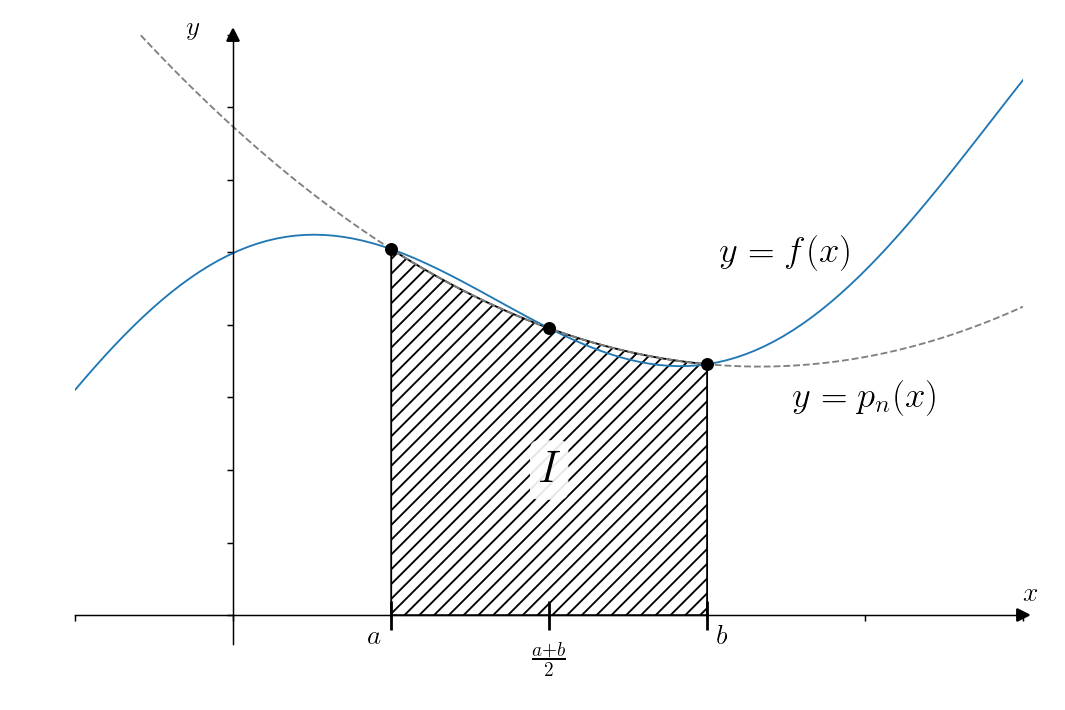

Text(2, 1, '$I$')

In [122]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=1)

# simpson's rule approx
ax.plot(xarray,yfunc_lagrange(xarray),color='grey',lw=1, ls='--')
ax.plot(x_interp,yfunc_lagrange(np.array(x_interp)),color='black',ls='',marker='o',markerfacecolor='black')
a,b=1,3
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor='black')

for x in x_interp:
    ax.vlines(x=x, ymin=-0.1, ymax=0.1, color='black')
ax.text(a-0.1,-0.15,r'$a$', fontsize=15, ha='center', va='center')
ax.text(b+0.1,-0.15,r'$b$', fontsize=15, ha='center', va='center')
ax.text(0.5*(a+b),-0.3,r'$\frac{a+b}{2}$', fontsize=15, ha='center', va='center')

squareside=3
centerx=2
centery=2
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(3.5,2.5,r'$y=f(x)$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(4,1.5,r'$y=p_n(x)$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(2,1,r'$I$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))


In [123]:
fig.savefig('../figures/ch5_simpsons.pdf')

### alternative trapezium

In [124]:
yfunc=lambda x: np.cos(x-0.1) + 0.4*x + 1.5

<IPython.core.display.Javascript object>


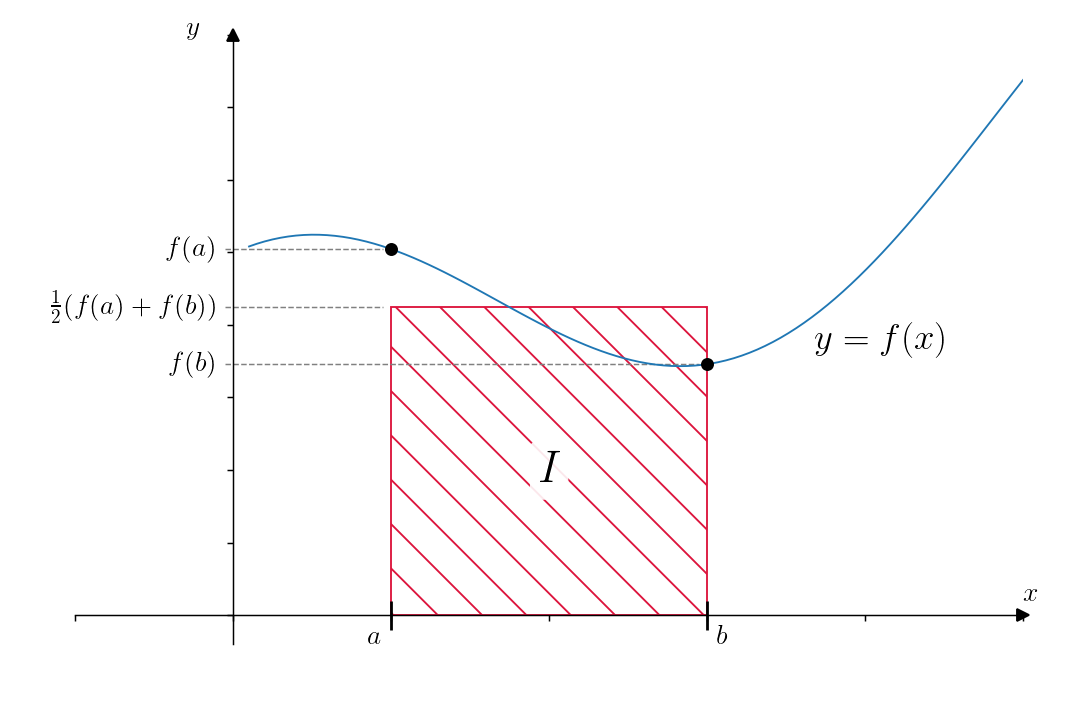

Text(2, 1, '$I$')

In [125]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

xarray=np.linspace(0.1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=1)

a,b=1,3
y= 0.5*(yfunc(a)+yfunc(b))
ax.add_patch(Polygon([(a, 0), (a, y), (b, y), (b, 0)],
                  hatch='\\', facecolor='none',edgecolor='crimson'))
ax.hlines(y=y, xmin=-0.05, xmax=a-0.05, color='grey', ls='--',lw=0.8)
ax.text(-0.1,y,r'$\frac{1}{2}(f(a)+f(b))$', fontsize=15, ha='right', va='center')

for x in [a,b]:
    ax.plot([x],[yfunc(x)],color='black',marker='o')
    ax.hlines(y=yfunc(x), xmin=-0.05, xmax=x-0.05, color='grey', ls='--',lw=0.8)
    
ax.text(-0.1,yfunc(a),r'$f(a)$', fontsize=15, ha='right', va='center')
ax.text(-0.1,yfunc(b),r'$f(b)$', fontsize=15, ha='right', va='center')

#x=np.linspace(a,b,100)
#ax.fill_between(x, np.cos(x-0.1) + 0.4*x + 1.5, y2=0,
#                            hatch='///', zorder=2, facecolor='none',edgecolor='black')

ax.vlines(x=a, ymin=-0.1, ymax=0.1, color='black')
ax.vlines(x=b, ymin=-0.1, ymax=0.1, color='black')
ax.text(a-0.1,-0.15,r'$a$', fontsize=15, ha='center', va='center')
ax.text(b+0.1,-0.15,r'$b$', fontsize=15, ha='center', va='center')

squareside=3
centerx=2
centery=2
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(4.1,1.9,r'$y=f(x)$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(2,1,r'$I$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))


In [126]:
fig.savefig('../figures/ch5_trapezium_alternative.pdf')

### example trapezium rule

In [127]:
yfunc = lambda x: np.exp(0.4*x)

<IPython.core.display.Javascript object>


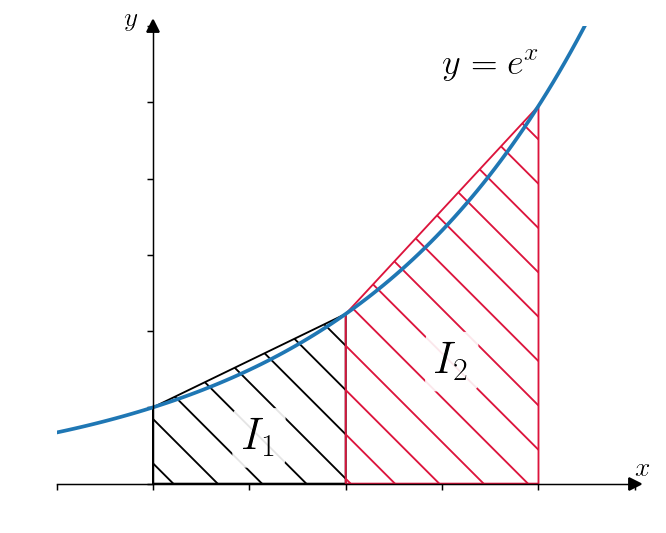

Text(3.1, 1.6, '$I_2$')

In [128]:
fig,ax=plt.subplots(figsize=(5,4))
fig.tight_layout()

xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=2)

ax.add_patch(Polygon([(0, 0), (0, 1), (2, yfunc(2)), (2, 0)],
                  hatch='\\', facecolor='none',edgecolor='black'))

ax.add_patch(Polygon([(2, 0), (2, yfunc(2)), (4, yfunc(4)), (4, 0)],
                  hatch='\\', facecolor='none',edgecolor='crimson'))


squareside=3
centerx=2
centery=3
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside,centery+squareside])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(3.5,5.5,r'$y=e^x$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(1.1,0.6,r'$I_1$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))

ax.text(3.1,1.6,r'$I_2$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))

#ax.axis('off')

In [129]:
fig.savefig('../figures/ch5_trapezium_example.pdf')

### example simpson's rule

In [130]:
yfunc = lambda x: np.exp(0.4*x)

x_interp1 = np.linspace(0,2,3,endpoint=True)
thing1 = p_lagrange(x_interp1,yfunc)
yfunc_lagrange1=lambda x: thing1[0]*(x-x_interp1[1])*(x-x_interp1[2]) + \
                          thing1[1]*(x-x_interp1[0])*(x-x_interp1[2]) + \
                          thing1[2]*(x-x_interp1[0])*(x-x_interp1[1])

x_interp2 = np.linspace(2,4,3,endpoint=True)
thing2 = p_lagrange(x_interp2,yfunc)
yfunc_lagrange2=lambda x: thing2[0]*(x-x_interp2[1])*(x-x_interp2[2]) + \
                          thing2[1]*(x-x_interp2[0])*(x-x_interp2[2]) + \
                          thing2[2]*(x-x_interp2[0])*(x-x_interp2[1])

<IPython.core.display.Javascript object>


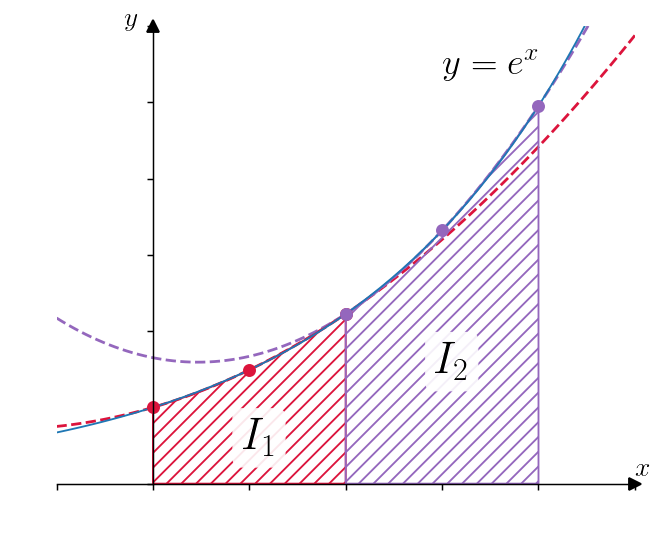

Text(3.1, 1.6, '$I_2$')

In [131]:
fig,ax=plt.subplots(figsize=(5,4))
fig.tight_layout()

xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=1)

# simpson's rule approx
color1='crimson'
ax.plot(xarray,yfunc_lagrange1(xarray),color=color1,lw=1.5, ls='--', zorder=0)
ax.plot(x_interp1,yfunc_lagrange1(np.array(x_interp1)),color=color1,ls='',marker='o')
a,b=0,2
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange1(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor=color1)

color2='C4'
ax.plot(xarray,yfunc_lagrange2(xarray),color=color2,lw=1.5, ls='--', zorder=0)
ax.plot(x_interp2,yfunc_lagrange2(np.array(x_interp2)),color=color2,ls='',marker='o')
a,b=2,4
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange2(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor=color2)

squareside=3
centerx=2
centery=3
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside,centery+squareside])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(3.5,5.5,r'$y=e^x$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(1.1,0.6,r'$I_1$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))

ax.text(3.1,1.6,r'$I_2$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))

#ax.axis('off')

In [132]:
fig.savefig('../figures/ch5_simpsons_example.pdf')

### simpson's rule refinement

In [133]:
yfunc=lambda x: np.cos(x-0.1) + 0.4*x + 1.5

x_interp1 = np.linspace(1,4,3,endpoint=True)
thing1 = p_lagrange(x_interp1,yfunc)
yfunc_lagrange1=lambda x: thing1[0]*(x-x_interp1[1])*(x-x_interp1[2]) + \
                          thing1[1]*(x-x_interp1[0])*(x-x_interp1[2]) + \
                          thing1[2]*(x-x_interp1[0])*(x-x_interp1[1])

x_interp2 = np.linspace(1,2.5,3,endpoint=True)
thing2 = p_lagrange(x_interp2,yfunc)
yfunc_lagrange2=lambda x: thing2[0]*(x-x_interp2[1])*(x-x_interp2[2]) + \
                          thing2[1]*(x-x_interp2[0])*(x-x_interp2[2]) + \
                          thing2[2]*(x-x_interp2[0])*(x-x_interp2[1])

x_interp3 = np.linspace(2.5,4,3,endpoint=True)
thing3 = p_lagrange(x_interp3,yfunc)
yfunc_lagrange3=lambda x: thing3[0]*(x-x_interp3[1])*(x-x_interp3[2]) + \
                          thing3[1]*(x-x_interp3[0])*(x-x_interp3[2]) + \
                          thing3[2]*(x-x_interp3[0])*(x-x_interp3[1])

x_interp4 = np.linspace(1,2,3,endpoint=True)
thing4 = p_lagrange(x_interp4,yfunc)
yfunc_lagrange4=lambda x: thing4[0]*(x-x_interp4[1])*(x-x_interp4[2]) + \
                          thing4[1]*(x-x_interp4[0])*(x-x_interp4[2]) + \
                          thing4[2]*(x-x_interp4[0])*(x-x_interp4[1])

x_interp5 = np.linspace(2,3,3,endpoint=True)
thing5 = p_lagrange(x_interp5,yfunc)
yfunc_lagrange5=lambda x: thing5[0]*(x-x_interp5[1])*(x-x_interp5[2]) + \
                          thing5[1]*(x-x_interp5[0])*(x-x_interp5[2]) + \
                          thing5[2]*(x-x_interp5[0])*(x-x_interp5[1])

x_interp6 = np.linspace(3,4,3,endpoint=True)
thing6 = p_lagrange(x_interp6,yfunc)
yfunc_lagrange6=lambda x: thing6[0]*(x-x_interp6[1])*(x-x_interp6[2]) + \
                          thing6[1]*(x-x_interp6[0])*(x-x_interp6[2]) + \
                          thing6[2]*(x-x_interp6[0])*(x-x_interp6[1])

<IPython.core.display.Javascript object>


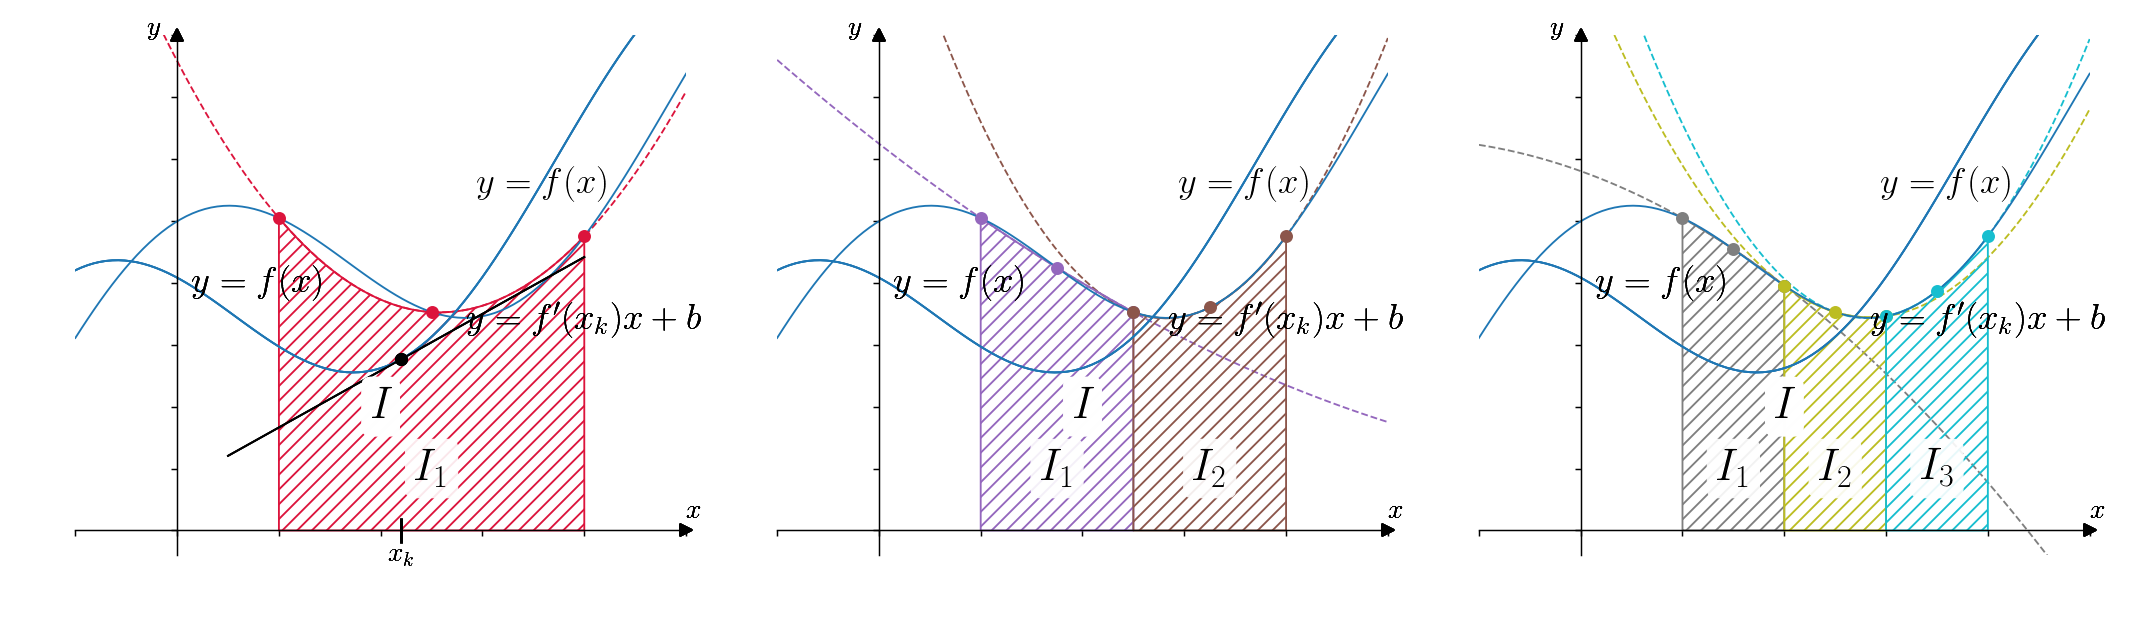

In [134]:
fig,axes=plt.subplots(figsize=(12,3.5),ncols=3)
fig.tight_layout()

xarray=np.linspace(-1,5,100)
for ax in axes:
    ax.plot(xarray,yfunc(xarray),color='C0',lw=1)

# simpson's rule approx

# simpson's rule 1 subdivision
ax=axes[0]
color1='crimson'
ax.plot(xarray,yfunc_lagrange1(xarray),color=color1,lw=1, ls='--', zorder=1)
ax.plot(x_interp1,yfunc_lagrange1(np.array(x_interp1)),color=color1,ls='',marker='o')
a,b=x_interp1[0],x_interp1[-1]
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange1(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor=color1)

ax.text(0.5*(a+b),0.5,r'$I_1$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))

# simpson's rule 2 subdivisions
ax=axes[1]
color1='C4'
ax.plot(xarray,yfunc_lagrange2(xarray),color=color1,lw=1, ls='--', zorder=1)
ax.plot(x_interp2,yfunc_lagrange2(np.array(x_interp2)),color=color1,ls='',marker='o')
a,b=x_interp2[0],x_interp2[-1]
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange2(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor=color1)
color2='C5'
ax.plot(xarray,yfunc_lagrange3(xarray),color=color2,lw=1, ls='--', zorder=1)
ax.plot(x_interp3,yfunc_lagrange3(np.array(x_interp3)),color=color2,ls='',marker='o')
a,b=x_interp3[0],x_interp3[-1]
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange3(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor=color2)

ax.text(0.5*(x_interp2[0]+x_interp2[-1]),0.5,r'$I_1$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))

ax.text(0.5*(x_interp3[0]+x_interp3[-1]),0.5,r'$I_2$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))


# simpson's rule 3 subdivisions
ax=axes[2]
color1='C7'
ax.plot(xarray,yfunc_lagrange4(xarray),color=color1,lw=1, ls='--', zorder=1)
ax.plot(x_interp4,yfunc_lagrange4(np.array(x_interp4)),color=color1,ls='',marker='o')
a,b=x_interp4[0],x_interp4[-1]
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange4(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor=color1)
color2='C8'
ax.plot(xarray,yfunc_lagrange5(xarray),color=color2,lw=1, ls='--', zorder=1)
ax.plot(x_interp5,yfunc_lagrange5(np.array(x_interp5)),color=color2,ls='',marker='o')
a,b=x_interp5[0],x_interp5[-1]
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange5(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor=color2)

color3='C9'
ax.plot(xarray,yfunc_lagrange6(xarray),color=color3,lw=1, ls='--', zorder=1)
ax.plot(x_interp6,yfunc_lagrange6(np.array(x_interp6)),color=color3,ls='',marker='o')
a,b=x_interp6[0],x_interp6[-1]
x=np.linspace(a,b,100)
ax.fill_between(x, yfunc_lagrange6(x), y2=0,
                            hatch='///', zorder=2, facecolor='none',edgecolor=color3)

ax.text(0.5*(x_interp4[0]+x_interp4[-1]),0.5,r'$I_1$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))

ax.text(0.5*(x_interp5[0]+x_interp5[-1]),0.5,r'$I_2$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))

ax.text(0.5*(x_interp6[0]+x_interp6[-1]),0.5,r'$I_3$', fontsize=25, rotation=0, ha='center', va='center',
       bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.9))


for ax in axes:
    squareside=3
    centerx=2
    centery=2
    ax.set_xlim([centerx-squareside,centerx+squareside])
    ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    #ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
    ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
    ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

    ax.text(3.6,2.8,r'$y=f(x)$', fontsize=20, rotation=0, ha='center', va='center')
    
#ax.axis('off')

In [135]:
fig.savefig('../figures/ch5_simpsons_refinement.pdf')

## Differentiation

### analytic derivative

In [144]:
yfunc=lambda x: np.cos(x+1) + 0.4*x + 1.5
dyfunc=lambda x: -np.sin(x+1) + 0.4

<IPython.core.display.Javascript object>


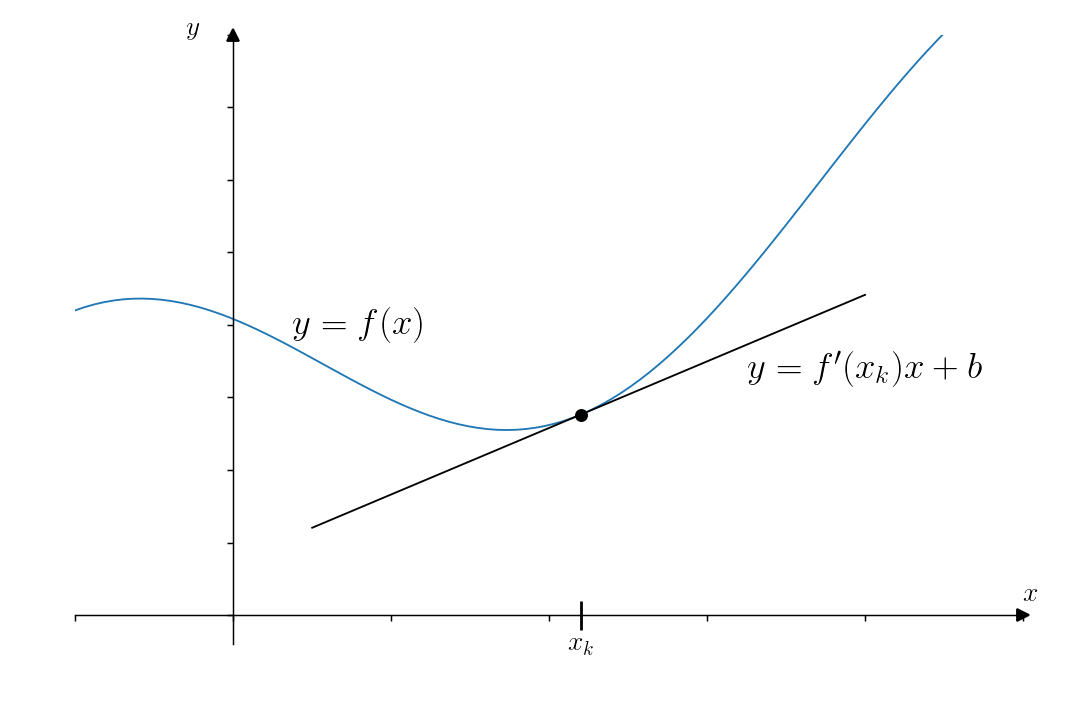

Text(4.0, 1.7, "$y=f'(x_k)x + b$")

In [160]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

# function
xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=1)

# tangent at at point
xarray2=np.linspace(0.5,4,100)
xk = 2.2
yk = yfunc(xk)
m  = dyfunc(xk)
b = yk - m*xk
yfunc_line = lambda x: m*x + b
ax.plot(xarray2,yfunc_line(xarray2),color='black',lw=1)
ax.plot([xk],[yk],color='black',marker='o')

ax.vlines(x=xk, ymin=-0.1, ymax=0.1, color='black')
ax.text(xk,-0.2,r'$x_k$', fontsize=15, ha='center', va='center')

squareside=3
centerx=2
centery=2
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(0.8,2,r'$y=f(x)$', fontsize=20, rotation=0, ha='center', va='center')
ax.text(4.0,1.7,r"$y=f'(x_k)x + b$", fontsize=20, rotation=0, ha='center', va='center')


In [161]:
fig.savefig('../figures/ch5_derivative.pdf')

### forward and backward finite difference

In [156]:
yfunc=lambda x: np.cos(x+1) + 0.4*x + 1.5
dyfunc=lambda x: -np.sin(x+1) + 0.4

<IPython.core.display.Javascript object>


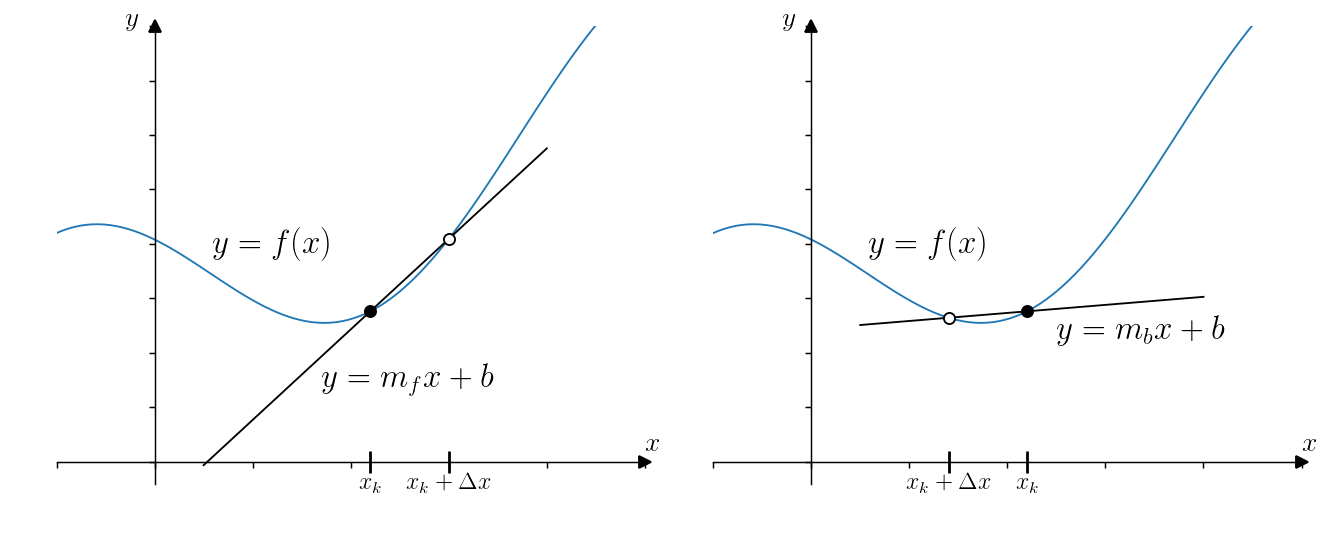

Text(1.4000000000000001, -0.2, '$x_k+\\Delta x$')

In [182]:
fig,axes=plt.subplots(figsize=(10,4),ncols=2)
fig.tight_layout()

# function
xarray=np.linspace(-1,5,100)
for ax in axes:
    ax.plot(xarray,yfunc(xarray),color='C0',lw=1)


    squareside=3
    centerx=2
    centery=2
    ax.set_xlim([centerx-squareside,centerx+squareside])
    ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    #ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
    ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
    ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

    ax.text(1.2,2,r'$y=f(x)$', fontsize=18, rotation=0, ha='center', va='center')
    
axes[0].text(1.7,0.75,r"$y=m_f x + b$", fontsize=18, rotation=0, ha='left', va='center')
axes[1].text(2.5,1.2,r"$y=m_b x + b$", fontsize=18, rotation=0, ha='left', va='center')
    
deltax=0.8
for k,dx in enumerate([deltax,-deltax]):
    ax=axes[k]
    # tangent at at point
    xarray2=np.linspace(0.5,4,100)
    x1 = 2.2
    x2 = x1 + dx
    y1 = yfunc(x1)
    y2 = yfunc(x2)
    
    m  = (y2-y1)/(x2-x1)
    b = y1 - m*x1
    yfunc_line = lambda x: m*x + b
    ax.plot(xarray2,yfunc_line(xarray2),color='black',lw=1)
    ax.plot([x1],[y1],color='black',marker='o')
    ax.plot([x2],[y2],color='black',marker='o',markerfacecolor='white')

    ax.vlines(x=x1, ymin=-0.1, ymax=0.1, color='black')
    ax.vlines(x=x1+dx, ymin=-0.1, ymax=0.1, color='black')
    ax.text(x1,-0.2,r'$x_k$', fontsize=13, ha='center', va='center')
axes[0].text(x1+deltax,-0.2,r'$x_k+\Delta x$', fontsize=13, ha='center', va='center')
axes[1].text(x1-deltax,-0.2,r'$x_k+\Delta x$', fontsize=13, ha='center', va='center')


In [183]:
fig.savefig('../figures/ch5_forward_backward_difference.pdf')

### dependence on second derivative

In [8]:
yfunc1=lambda x: (x-2)**2 + 1 
yfunc2=lambda x: 0.2*(x-2)**2 + 1 

<IPython.core.display.Javascript object>


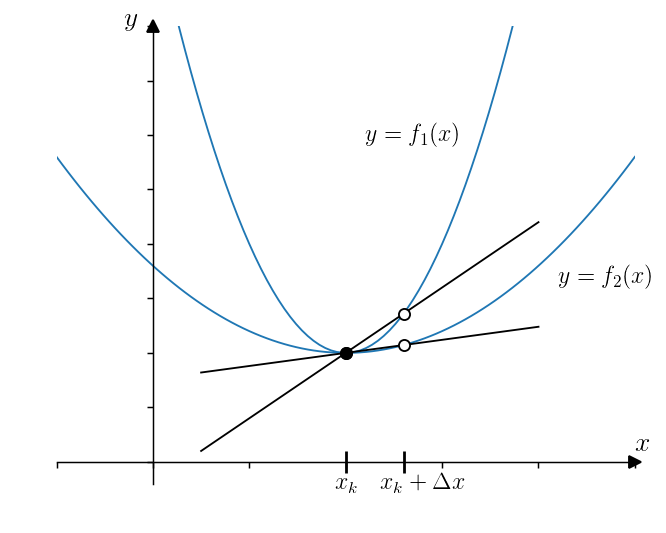

Text(4.2, 1.7, '$y=f_2(x)$')

In [22]:
fig,ax=plt.subplots(figsize=(5,4))
fig.tight_layout()

# function
xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc1(xarray),color='C0',lw=1)
ax.plot(xarray,yfunc2(xarray),color='C0',lw=1)

squareside=3
centerx=2
centery=2
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])
    
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

#ax.text(1.7,0.75,r"$y=m_f x + b$", fontsize=18, rotation=0, ha='left', va='center')
#ax.text(2.5,1.2,r"$y=m_b x + b$", fontsize=18, rotation=0, ha='left', va='center')
  
    
# tangent at a point
dx = 0.6
xarray2=np.linspace(0.5,4,100)
x1 = 2
x2 = x1 + dx

# tangent line for function 1
y1 = yfunc1(x1)
y2 = yfunc1(x2)
m  = (y2-y1)/(x2-x1)
b = y1 - m*x1
yfunc_line = lambda x: m*x + b
ax.plot(xarray2,yfunc_line(xarray2),color='black',lw=1)
ax.plot([x1],[y1],color='black',marker='o')
ax.plot([x2],[y2],color='black',marker='o',markerfacecolor='white')

# tangent line for function 2
y1 = yfunc2(x1)
y2 = yfunc2(x2)
m  = (y2-y1)/(x2-x1)
b = y1 - m*x1
yfunc_line = lambda x: m*x + b
ax.plot(xarray2,yfunc_line(xarray2),color='black',lw=1)
ax.plot([x1],[y1],color='black',marker='o')
ax.plot([x2],[y2],color='black',marker='o',markerfacecolor='white')

ax.vlines(x=x1, ymin=-0.1, ymax=0.1, color='black')
ax.vlines(x=x1+dx, ymin=-0.1, ymax=0.1, color='black')
ax.text(x1,-0.2,r'$x_k$', fontsize=13, ha='center', va='center')
ax.text(x1+0.6*dx,-0.2,r'$x_k+\Delta x$', fontsize=13, ha='left', va='center')

ax.text(3.2,3,r'$y=f_1(x)$', fontsize=13, ha='right', va='center')
ax.text(4.2,1.7,r'$y=f_2(x)$', fontsize=13, ha='left', va='center')

In [23]:
fig.savefig('../figures/ch5_forward_difference_2nd_deriv.pdf')

### centred finite difference

In [26]:
yfunc=lambda x: np.cos(x-0.1) + 0.4*x + 1.5

x_interp = [1.0,2.0,3.0]
x_interp = np.linspace(1,3,3,endpoint=True)
thing = p_lagrange(x_interp,yfunc)
yfunc_lagrange=lambda x: thing[0]*(x-x_interp[1])*(x-x_interp[2]) + \
                         thing[1]*(x-x_interp[0])*(x-x_interp[2]) + \
                         thing[2]*(x-x_interp[0])*(x-x_interp[1])

<IPython.core.display.Javascript object>


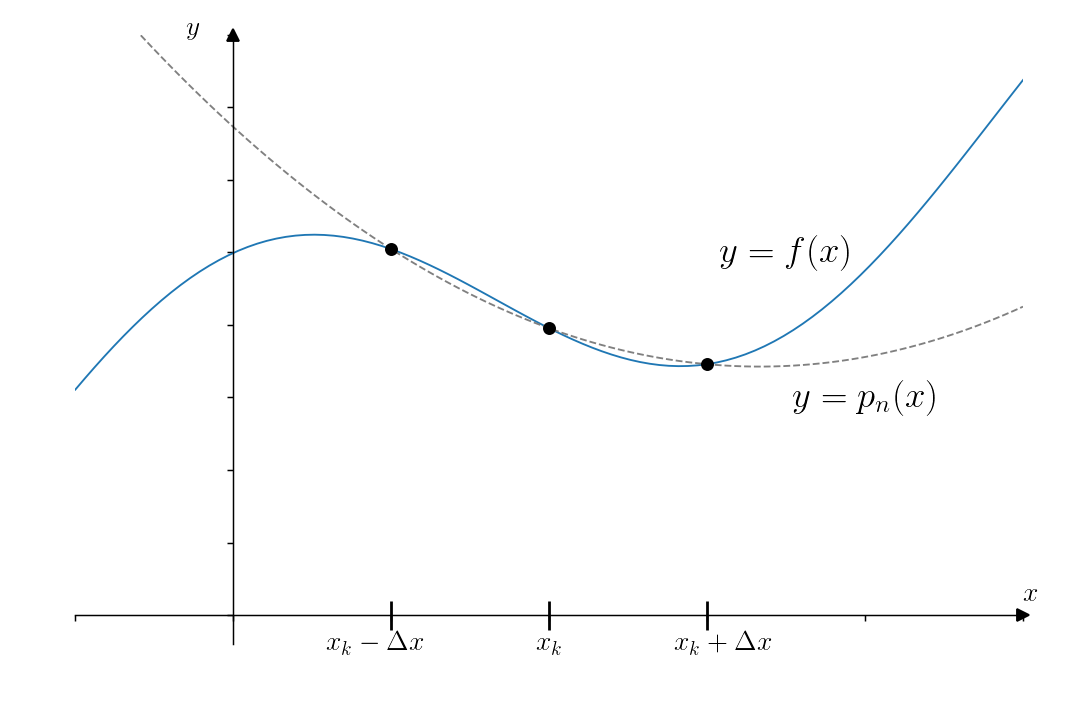

Text(4, 1.5, '$y=p_n(x)$')

In [30]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=1)

# simpson's rule approx
ax.plot(xarray,yfunc_lagrange(xarray),color='grey',lw=1, ls='--')
ax.plot(x_interp,yfunc_lagrange(np.array(x_interp)),color='black',ls='',marker='o',markerfacecolor='black')
a,b=1,3
x=np.linspace(a,b,100)

for x in x_interp:
    ax.vlines(x=x, ymin=-0.1, ymax=0.1, color='black')
ax.text(a-0.1,-0.2,r'$x_k-\Delta x$', fontsize=15, ha='center', va='center')
ax.text(b+0.1,-0.2,r'$x_k+\Delta x$', fontsize=15, ha='center', va='center')
ax.text(0.5*(a+b),-0.2,r'$x_k$', fontsize=15, ha='center', va='center')

squareside=3
centerx=2
centery=2
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(3.5,2.5,r'$y=f(x)$', fontsize=20, rotation=0, ha='center', va='center')

ax.text(4,1.5,r'$y=p_n(x)$', fontsize=20, rotation=0, ha='center', va='center')



In [31]:
fig.savefig('../figures/ch5_centred_finite_difference.pdf')

### centred, forward and backward finite difference

In [39]:
yfunc=lambda x: np.cos(x+1) + 0.4*x + 1.5
dyfunc=lambda x: -np.sin(x+1) + 0.4

<IPython.core.display.Javascript object>


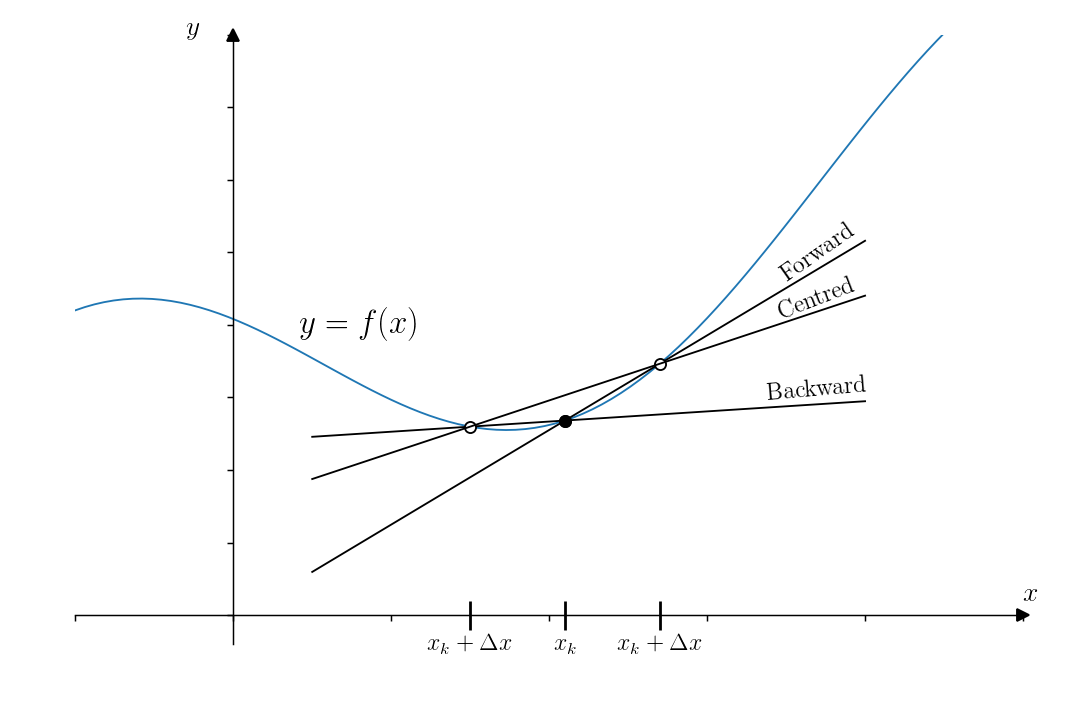

Text(3.7, 2.17, '${\\rm Centred}$')

In [66]:
fig,ax=plt.subplots(figsize=(6,4))
fig.tight_layout()

# function
xarray=np.linspace(-1,5,100)
ax.plot(xarray,yfunc(xarray),color='C0',lw=1)

squareside=3
centerx=2
centery=2
ax.set_xlim([centerx-squareside,centerx+squareside])
ax.set_ylim([centery-squareside+0.8,centery+squareside-1])

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
#ax.text(.95,0.43,r'$x$', transform=fig.transFigure, fontsize=15)
ax.text(ax.get_xlim()[1],0.1,r'$x$', fontsize=15)
ax.text(-0.3,ax.get_ylim()[1],r'$y$', fontsize=15)

ax.text(0.8,2,r'$y=f(x)$', fontsize=18, rotation=0, ha='center', va='center')
    
#ax.text(1.7,0.75,r"$y=m_f x + b$", fontsize=18, rotation=0, ha='left', va='center')
#ax.text(2.5,1.2,r"$y=m_b x + b$", fontsize=18, rotation=0, ha='left', va='center')

deltax=0.6
xarray2=np.linspace(0.5,4,100)
xk = 2.1
for k,dx in enumerate([deltax,-deltax]):
    # tangent at at point
    x1 = xk
    x2 = xk + dx
    y1 = yfunc(x1)
    y2 = yfunc(x2)
    m  = (y2-y1)/(x2-x1)
    b = y1 - m*x1
    yfunc_line = lambda x: m*x + b
    ax.plot(xarray2,yfunc_line(xarray2),color='black',lw=1)
    ax.plot([x1],[y1],color='black',marker='o')
    ax.plot([x2],[y2],color='black',marker='o',markerfacecolor='white')

    ax.vlines(x=x1+dx, ymin=-0.1, ymax=0.1, color='black')
    
x1 = xk - deltax
x2 = xk + deltax
y1 = yfunc(x1)
y2 = yfunc(x2)
m  = (y2-y1)/(x2-x1)
b = y1 - m*x1
yfunc_line = lambda x: m*x + b
ax.plot(xarray2,yfunc_line(xarray2),color='black',lw=1)
    
ax.vlines(x=xk, ymin=-0.1, ymax=0.1, color='black')
ax.text(xk,-0.2,r'$x_k$', fontsize=13, ha='center', va='center')
ax.text(xk+deltax,-0.2,r'$x_k+\Delta x$', fontsize=13, ha='center', va='center')
ax.text(xk-deltax,-0.2,r'$x_k+\Delta x$', fontsize=13, ha='center', va='center')

ax.text(3.7,2.49,r'${\rm Forward}$', fontsize=13, rotation=35, ha='center', va='center')
ax.text(3.7,1.55,r'${\rm Backward}$', fontsize=13, rotation=5, ha='center', va='center')
ax.text(3.7,2.17,r'${\rm Centred}$', fontsize=13, rotation=21, ha='center', va='center')


In [67]:
fig.savefig('../figures/ch5_centred_forward_backward_difference.pdf')